In [ ]:
import pandas as pd

with open('/work/test.json', encoding='utf-8') as inputfile:
    df = pd.read_json(inputfile)

#df.to_csv('csvfile.csv', encoding='utf-8', index=False

In [ ]:
#assign each ingredient to a value, use this value to classify, make hash map/dictionary

In [ ]:
df.shape

(9944, 2)

In [ ]:
df.isnull().sum()

id             0
ingredients    0
dtype: int64

In [ ]:
df = df.dropna()
df.isnull().sum()

id             0
ingredients    0
dtype: int64

In [ ]:
import nltk
from nltk import FreqDist
nltk.download('punkt')  # You may need to download the 'punkt' tokenizer models if you haven't already

vocabulary = FreqDist()  # Initialize the frequency distribution

# Assuming df is a pandas DataFrame and 'ingredients' is a column in it
for ingredients_list in df['ingredients']:
    for ingredients in ingredients_list:
        ingredients = ingredients.split()
        vocabulary.update(ingredients)

# Print the most common 200 words and their frequencies
for word, frequency in vocabulary.most_common(200):
    print(f'{word}:{frequency}')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
pepper:6351
salt:6112
oil:5736
garlic:4672
ground:4568
fresh:4311
sauce:3153
sugar:3141
onions:3109
cheese:2889
chicken:2856
black:2667
olive:2641
water:2434
red:2345
flour:2249
butter:2184
green:2148
tomatoes:2123
powder:2014
chopped:1918
cloves:1865
juice:1827
white:1719
onion:1714
eggs:1668
rice:1603
cream:1594
lemon:1490
cilantro:1482
milk:1471
vegetable:1429
large:1391
leaves:1354
ginger:1346
corn:1335
dried:1270
lime:1258
vinegar:1218
soy:1199
all-purpose:1184
cumin:1168
chili:1097
broth:1066
bell:1058
parsley:1025
wine:1020
beans:878
sesame:874
kosher:834
grated:823
carrots:822
seeds:792
paste:776
dry:747
baking:730
basil:729
brown:729
unsalted:728
beef:719
boneless:716
parmesan:712
chilies:706
oregano:686
extra-virgin:677
cinnamon:650
egg:641
shredded:629
chile:624
potatoes:616
diced:613
tomato:612
pork:612
thyme:608
cooking:604
bay:595
tortillas:580
bread:570
coriander:566

In [ ]:
#recipe_df = pd.read_csv(config.RECIPES_PATH)
#df['ingredients_parsed'] = df['ingredients'].apply(lambda x: ingredient_parser(x))
removed_df = df.dropna()
removed_df.to_csv('recipes_cleaned.csv', sep=';', encoding='utf-8', index=False)

In [ ]:
removed_df

,id,ingredients
0,18009,"[baking powder, eggs, all-purpose flour, raisi..."
1,28583,"[sugar, egg yolks, corn starch, cream of tarta..."
2,41580,"[sausage links, fennel bulb, fronds, olive oil..."
3,29752,"[meat cuts, file powder, smoked sausage, okra,..."
4,35687,"[ground black pepper, salt, sausage casings, l..."
...,...,...
9939,30246,"[large egg yolks, fresh lemon juice, sugar, bo..."
9940,36028,"[hot sauce, butter, sweet potatoes, adobo sauc..."
9941,22339,"[black pepper, salt, parmigiano reggiano chees..."
9942,42525,"[cheddar cheese, cayenne, paprika, plum tomato..."


In [ ]:
val = removed_df.at[65,'ingredients']
val

['diced onions',
 'eggplant',
 'crushed red pepper',
 'red bell pepper',
 'dried basil',
 'paprika',
 'long-grain rice',
 'dried oregano',
 'tomatoes',
 'zucchini',
 'chickpeas',
 'celery',
 'olive oil',
 'vegetable broth',
 'feta cheese crumbles']

In [ ]:
nutrition = pd.read_csv("/work/nutrition.csv")
nutrition

,Unnamed: 0,name,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
0,0,Cornstarch,100 g,381,0.1g,NaN,0,9.00 mg,0.4 mg,0.00 mcg,...,0.05 g,0.009 g,0.016 g,0.025 g,0.00 mg,0.0 g,0.09 g,0.00 mg,0.00 mg,8.32 g
1,1,"Nuts, pecans",100 g,691,72g,6.2g,0,0.00 mg,40.5 mg,22.00 mcg,...,71.97 g,6.180 g,40.801 g,21.614 g,0.00 mg,0.0 g,1.49 g,0.00 mg,0.00 mg,3.52 g
2,2,"Eggplant, raw",100 g,25,0.2g,NaN,0,2.00 mg,6.9 mg,22.00 mcg,...,0.18 g,0.034 g,0.016 g,0.076 g,0.00 mg,0.0 g,0.66 g,0.00 mg,0.00 mg,92.30 g
3,3,"Teff, uncooked",100 g,367,2.4g,0.4g,0,12.00 mg,13.1 mg,0,...,2.38 g,0.449 g,0.589 g,1.071 g,0,0,2.37 g,0,0,8.82 g
4,4,"Sherbet, orange",100 g,144,2g,1.2g,1mg,46.00 mg,7.7 mg,4.00 mcg,...,2.00 g,1.160 g,0.530 g,0.080 g,1.00 mg,0.0 g,0.40 g,0.00 mg,0.00 mg,66.10 g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8784,8784,"Beef, raw, all grades, trimmed to 0"" fat, sepa...",100 g,125,3.5g,1.4g,62mg,54.00 mg,64.5 mg,4.00 mcg,...,3.50 g,1.353 g,1.554 g,0.244 g,62.00 mg,0.0 g,1.11 g,0.00 mg,0.00 mg,72.51 g
8785,8785,"Lamb, cooked, separable lean only, composite o...",100 g,206,8.9g,3.9g,109mg,50.00 mg,0,0.00 mcg,...,8.86 g,3.860 g,3.480 g,0.520 g,109.00 mg,0,1.60 g,0,0,59.95 g
8786,8786,"Lamb, raw, separable lean and fat, composite o...",100 g,277,23g,12g,78mg,39.00 mg,0,1.00 mcg,...,22.74 g,11.570 g,8.720 g,0.980 g,78.00 mg,0,0.92 g,0,0,59.80 g
8787,8787,"Beef, raw, all grades, trimmed to 0"" fat, sepa...",100 g,121,3g,1.1g,60mg,53.00 mg,64.2 mg,4.00 mcg,...,3.04 g,1.086 g,1.266 g,0.233 g,60.00 mg,0.0 g,1.10 g,0.00 mg,0.00 mg,73.43 g


In [ ]:
val = nutrition.at[8785,'name']
def convert(string):
    li = list(string.split(", "))
    return li
#recursion? write a helper function that takes in the val of name, and turns it into a list --> 
for i in range(len(nutrition)):
    old_val = nutrition.at[i, 'name']
    old_val = convert(old_val)
    nutrition.at[i, 'name'] = old_val[0]
nutrition

,Unnamed: 0,name,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
0,0,Cornstarch,100 g,381,0.1g,NaN,0,9.00 mg,0.4 mg,0.00 mcg,...,0.05 g,0.009 g,0.016 g,0.025 g,0.00 mg,0.0 g,0.09 g,0.00 mg,0.00 mg,8.32 g
1,1,Nuts,100 g,691,72g,6.2g,0,0.00 mg,40.5 mg,22.00 mcg,...,71.97 g,6.180 g,40.801 g,21.614 g,0.00 mg,0.0 g,1.49 g,0.00 mg,0.00 mg,3.52 g
2,2,Eggplant,100 g,25,0.2g,NaN,0,2.00 mg,6.9 mg,22.00 mcg,...,0.18 g,0.034 g,0.016 g,0.076 g,0.00 mg,0.0 g,0.66 g,0.00 mg,0.00 mg,92.30 g
3,3,Teff,100 g,367,2.4g,0.4g,0,12.00 mg,13.1 mg,0,...,2.38 g,0.449 g,0.589 g,1.071 g,0,0,2.37 g,0,0,8.82 g
4,4,Sherbet,100 g,144,2g,1.2g,1mg,46.00 mg,7.7 mg,4.00 mcg,...,2.00 g,1.160 g,0.530 g,0.080 g,1.00 mg,0.0 g,0.40 g,0.00 mg,0.00 mg,66.10 g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8784,8784,Beef,100 g,125,3.5g,1.4g,62mg,54.00 mg,64.5 mg,4.00 mcg,...,3.50 g,1.353 g,1.554 g,0.244 g,62.00 mg,0.0 g,1.11 g,0.00 mg,0.00 mg,72.51 g
8785,8785,Lamb,100 g,206,8.9g,3.9g,109mg,50.00 mg,0,0.00 mcg,...,8.86 g,3.860 g,3.480 g,0.520 g,109.00 mg,0,1.60 g,0,0,59.95 g
8786,8786,Lamb,100 g,277,23g,12g,78mg,39.00 mg,0,1.00 mcg,...,22.74 g,11.570 g,8.720 g,0.980 g,78.00 mg,0,0.92 g,0,0,59.80 g
8787,8787,Beef,100 g,121,3g,1.1g,60mg,53.00 mg,64.2 mg,4.00 mcg,...,3.04 g,1.086 g,1.266 g,0.233 g,60.00 mg,0.0 g,1.10 g,0.00 mg,0.00 mg,73.43 g


In [ ]:
new_nutrition = nutrition[['name','saturated_fat','sodium']]
new_nutrition.loc[:, 'saturated_fat'] = pd.to_numeric(new_nutrition['saturated_fat'].str.replace('g', ''))
new_nutrition.loc[:, 'sodium'] = pd.to_numeric(new_nutrition['sodium'].str.replace('mg', ''))
new_nutrition.loc[:, 'sodium'] = new_nutrition['sodium'] / 1000
new_nutrition

,name,saturated_fat,sodium
0,Cornstarch,NaN,0.009
1,Nuts,6.2,0.0
2,Eggplant,NaN,0.002
3,Teff,0.4,0.012
4,Sherbet,1.2,0.046
...,...,...,...
8784,Beef,1.4,0.054
8785,Lamb,3.9,0.05
8786,Lamb,12.0,0.039
8787,Beef,1.1,0.053


In [ ]:
#group name column by ingredient, find the average of the saturated fat and sodium levels 

nutrition_grouped = new_nutrition.groupby('name').mean().reset_index()
nutrition_grouped['name'] = nutrition_grouped['name'].str.lower()
nutrition_grouped

,name,saturated_fat,sodium
0,andrea's,NaN,0.544
1,applebee's,3.036364,0.608
2,arby's,3.4,0.653
3,archway home style cookies,5.164706,0.399235
4,austin,4.545455,0.787818
...,...,...,...
1098,yellow rice with seasoning,NaN,1.316
1099,yogurt,0.7625,0.054886
1100,yogurt parfait,0.5,0.049
1101,yokan,NaN,0.083


#for each row in ingredients, go through list and check if the element is the same as element in name of nutrition.csv
#if it is, add ingredient to dictionary. Bound to the key is a tuple (sodium, saturated_fat) of that ingredient. 

In [ ]:
nutrition_grouped 

,name,saturated_fat,sodium
0,andrea's,NaN,0.544
1,applebee's,3.036364,0.608
2,arby's,3.4,0.653
3,archway home style cookies,5.164706,0.399235
4,austin,4.545455,0.787818
...,...,...,...
1098,yellow rice with seasoning,NaN,1.316
1099,yogurt,0.7625,0.054886
1100,yogurt parfait,0.5,0.049
1101,yokan,NaN,0.083


In [ ]:
#creating the dictionary of ingredients and their sodium + fat content 
#need to make sure to check if the ingredient is already in dictionary
import numpy as np
nutrition_info = {}
for i in range(len(removed_df)):
    val = removed_df.at[i,'ingredients']#list of ingredients in row 
    for ingredient in val:
        if ingredient in nutrition_grouped['name'].values:
            #get sodium and saturated fat levels
            sodium_level = nutrition_grouped.loc[nutrition_grouped['name'] == ingredient, 'sodium'].values[0]
            saturated_fat_level = nutrition_grouped.loc[nutrition_grouped['name'] == ingredient, 'saturated_fat'].values[0]
            
            nutrition_info[ingredient] = [sodium_level, saturated_fat_level]
            
        #check if the ingredient matches any of the values in name col of nutrition 
for key in nutrition_info:
    if np.isnan(nutrition_info[key][0]):
        nutrition_info[key][0] = 0
    if np.isnan(nutrition_info[key][1]):
        nutrition_info[key][1] = 0

nutrition_info
    

{'eggs': [0.162, 1.1],
 'raisins': [0.017, 0.16666666666666666],
 'milk': [0.17191836734693872, 2.224999999999999],
 'sugar': [0.0, 0],
 'bananas': [0.002, 0.39999999999999997],
 'vanilla extract': [0.005333333333333333, 0],
 'onions': [0.07750000000000001, 0.45],
 'okra': [0.08316666666666667, 0.10000000000000002],
 'water': [0.006, 0],
 'vegetable oil': [0.0, 82.0],
 'ham': [1.1354285714285715, 3.314285714285714],
 'salt': [38.758, 0],
 'leeks': [0.07775, 0.3],
 'cornmeal': [0.5294, 0.4533333333333334],
 'lemon juice': [0.001, 0],
 'grape juice': [0.005, 0],
 'orange juice': [0.0035000000000000005, 0.1],
 'soy sauce': [2.89, 0],
 'garlic': [0.017, 0.1],
 'cherries': [0.004125, 0.10000000000000002],
 'dates': [0.0015, 0],
 'cake': [0.4632307692307691, 3.0499999999999994],
 'prunes': [0.0033333333333333335, 0.1],
 'butter': [0.3446, 42.8],
 'pasta': [0.023333333333333334, 0.25454545454545463],
 'basil': [0.004, 0],
 'margarine': [0.5828571428571429, 15.214285714285714],
 'apricot necta

In [ ]:
#for each recipe in the recipe table, go through all the datasets to find the total sodium level, repeat for saturated fat level 
#write a function 
def total_calc(list, sodium_or_fat):#takes in a list of ingredients
    #check for if an ingredient isn't available in nutrition_info
    total = 0 
    for ingredient in list:
        if ingredient in nutrition_info:
            index = 0
            if sodium_or_fat == 'saturated_fat':
                index = 1
            total += nutrition_info[ingredient][index]
    return total
sodium_array = []
saturated_fat_array = []
for i in range(len(removed_df)):
    val = removed_df.at[i,'ingredients']#list of ingredients in row
    sodium_array += [total_calc(val, 'sodium')]
    saturated_fat_array += [total_calc(val, 'saturated_fat')]
removed_df['total sodium'] = sodium_array
removed_df['total saturated fat'] = saturated_fat_array
#removed_df = removed_df.drop('ingredients_parsed', axis = 1)
removed_df

,id,ingredients,total sodium,total saturated fat
0,18009,"[baking powder, eggs, all-purpose flour, raisi...",0.350918,3.491667
1,28583,"[sugar, egg yolks, corn starch, cream of tarta...",0.179252,2.625000
2,41580,"[sausage links, fennel bulb, fronds, olive oil...",0.077500,0.450000
3,29752,"[meat cuts, file powder, smoked sausage, okra,...",1.224595,85.414286
4,35687,"[ground black pepper, salt, sausage casings, l...",39.371150,0.753333
...,...,...,...,...
9939,30246,"[large egg yolks, fresh lemon juice, sugar, bo...",38.758000,0.000000
9940,36028,"[hot sauce, butter, sweet potatoes, adobo sauc...",39.282600,43.850000
9941,22339,"[black pepper, salt, parmigiano reggiano chees...",38.758000,82.000000
9942,42525,"[cheddar cheese, cayenne, paprika, plum tomato...",39.280518,45.025000


In [ ]:
#if sodium > 0.5 = unhealthy
#0.2 < sodium < 0.5 = moderatly healthy
#sodium < 0.2 = healthy 

#if sat fat > 13 = unhealthy
# 11 < sat fat < 13 = moderately healthy 
# sat fat < 11 = healthy 
#0 is unhealthy
#1 is moderatly healthy
#2 is healthy

#find the class/label depending on each, then randomize?
def find_class(array, max, min):
    class_list = []
    for value in array:
        if value > max:
            class_list += [0]
        elif value > min:
            class_list += [1]
        else:
            class_list += [2]
    return class_list 
sodium_class = find_class(removed_df['total sodium'], 0.5, 0.2)
sat_fat_class = find_class(removed_df['total saturated fat'], 13, 11)
removed_df['sodium label'] = sodium_class
removed_df['saturated fat label'] = sat_fat_class
removed_df

,id,ingredients,total sodium,total saturated fat,sodium label,saturated fat label
0,18009,"[baking powder, eggs, all-purpose flour, raisi...",0.350918,3.491667,1,2
1,28583,"[sugar, egg yolks, corn starch, cream of tarta...",0.179252,2.625000,2,2
2,41580,"[sausage links, fennel bulb, fronds, olive oil...",0.077500,0.450000,2,2
3,29752,"[meat cuts, file powder, smoked sausage, okra,...",1.224595,85.414286,0,0
4,35687,"[ground black pepper, salt, sausage casings, l...",39.371150,0.753333,0,2
...,...,...,...,...,...,...
9939,30246,"[large egg yolks, fresh lemon juice, sugar, bo...",38.758000,0.000000,0,2
9940,36028,"[hot sauce, butter, sweet potatoes, adobo sauc...",39.282600,43.850000,0,0
9941,22339,"[black pepper, salt, parmigiano reggiano chees...",38.758000,82.000000,0,0
9942,42525,"[cheddar cheese, cayenne, paprika, plum tomato...",39.280518,45.025000,0,0


In [ ]:
#check the labels, if its the same, then don't change, if its different, randomly pick between the two 
#creating the final label 
import random
sodium_label = removed_df['sodium label']
sat_fat_label = removed_df['saturated fat label']
final_label = []
for i in range(len(sodium_label)):
    choices = [sodium_label[i], sat_fat_label[i]]
    if choices[0] == [choices[1]]:
        final_label += [choices[0]]
    else:
        random_num = random.randint(0, 1)
        final_label += [choices[random_num]]
removed_df['health rating'] = final_label
final = removed_df.drop(['sodium label','saturated fat label','id','ingredients'], axis = 1)
final

,total sodium,total saturated fat,health rating
0,0.350918,3.491667,2
1,0.179252,2.625000,2
2,0.077500,0.450000,2
3,1.224595,85.414286,0
4,39.371150,0.753333,2
...,...,...,...
9939,38.758000,0.000000,2
9940,39.282600,43.850000,0
9941,38.758000,82.000000,0
9942,39.280518,45.025000,0


<AxesSubplot: xlabel='total sodium', ylabel='total saturated fat'>

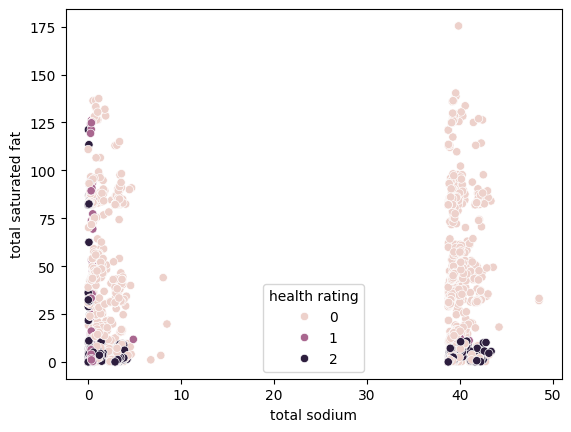

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x=final['total sodium'],y=final['total saturated fat'], hue=final['health rating'])

In [ ]:
#normalize the data and split into training and testing 
# Split the data into features (X) and target (y)
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

X = final.drop('health rating', axis=1)
y = final['health rating']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#fitting and evaluating model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
#predit
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.743086978381096


In [ ]:
import joblib
joblib.dump(knn, 'knn_model.joblib')

['knn_model.joblib']

In [ ]:
new_examples = np.array([0.5, 6])

# Reshape the input array to a 2D array
new_examples_2d = new_examples.reshape(1, -1)

# Scale the new examples using the same scaler used for training
new_examples_scaled = scaler.transform(new_examples_2d)
pred = knn.predict(new_examples_scaled)
pred[0]

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


0

In [ ]:
import json
with open('nutrition_info.json', 'w') as json_file:
    json.dump(nutrition_info, json_file)

In [ ]:
#now, with a list of ingredients, we can take that list, go through the ingredients dictionary to find the sodium and saturated fat level
#then, scale it with StandardScaler, and predict the class. 
def classify(ingredients_list):
    sodium = 0 
    sat_fat = 0
    for ingredient in ingredients_list:
        if ingredient in nutrition_info:
            sodium += nutrition_info[ingredient][0]
            sat_fat += nutrition_info[ingredient][1]
    example = np.array([sodium, sat_fat])
    example = example.reshape(1, -1)
    example_scaled = scaler.transform(example)
    prediction = knn.predict(example_scaled)
    final_pred = prediction[0]
    if final_pred == 0:
        return "unhealthy"
    if final_pred == 1:
        return "moderately healthy"
    if final_pred == 2:
        return "healthy"
classify(['avocado', 'egg', 'garlic', 'almond', 'kale', 'banana', 'tomatoe'])

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


'healthy'

In [ ]:
'chocolate','sugar','butter','milk','sour cream','cinnamon'
'avocado', 'egg', 'garlic', 'almond', 'kale', 'banana', 'tomatoe'
'chocolate','sugar','almond', 'kale', 'banana', 'tomatoe' 


('chocolate', 'sugar', 'almond', 'kale', 'banana', 'tomatoe')

Recipe Generation with Input Ingredients

In [ ]:
name = 'Food Ingredients and Recipe Dataset with Image Name Mapping.csv'
RecipeData = pd.read_csv(name).dropna()
RecipeData["Cleaned_Ingredients"]

0        ['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher...
1        ['2 large egg whites', '1 pound new potatoes (...
2        ['1 cup evaporated milk', '1 cup whole milk', ...
3        ['1 (¾- to 1-pound) round Italian loaf, cut in...
4        ['1 teaspoon dark brown sugar', '1 teaspoon ho...
                               ...                        
13496    ['1 cup all-purpose flour', '2/3 cup unsweeten...
13497    ['1 preserved lemon', '1 1/2 pound butternut s...
13498    ['Leftover katsuo bushi (dried bonito flakes) ...
13499    ['1 stick (1/2 cup) plus 1 tablespoon unsalted...
13500    ['12 medium to large fresh poblano chiles (2 1...
Name: Cleaned_Ingredients, Length: 13493, dtype: object

In [ ]:
def fs(myIngredients, ingredients):
    score = 0
    for ingredient in myIngredients:
        if ingredient in ingredients:
            score += 1
    return score

    
def findScore(myIngredients):
    return lambda x: fs(myIngredients, x)





def findBestRecipe(listOfIngredients):
    func = findScore(listOfIngredients)
    RecipeDataCopy = RecipeData.copy()
    RecipeDataCopy['Score'] = RecipeDataCopy["Cleaned_Ingredients"].apply(func)
    R = RecipeDataCopy.sort_values(by='Score', ascending=False)
    return [R.iloc[0]['Title'], R.iloc[0]['Ingredients'], R.iloc[0]['Instructions']]


In [ ]:
def findRecipeAndHealth(listOfIngredients):
    ret1 = findBestRecipe(listOfIngredients)
    re2 = classify(listOfIngredients)
    return ret1, re2

    

In [ ]:
'chocolate','sugar','butter','milk','sour cream','cinnamon'
'salmon','rice','quinoa','broccoli','chicken stock'

('salmon', 'rice', 'quinoa', 'broccoli', 'chicken stock')

### Healthiness Classifier 

Input your Ingredients Here: 

In [ ]:
classify(['apple', 'crust', 'butter', 'sugar', 'milk'])

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


'unhealthy'

### Recipe Generator 

input your ingredients Here:

In [ ]:
findBestRecipe(['apple', 'crust', 'butter', 'sugar', 'milk'])

['Rum Raisin Apple Pie',
 "['3 tablespoons dark rum', '1/3 cup raisins', '2/3 cup packed light brown sugar', '3 tablespoons all-purpose flour', '1 teaspoon finely grated fresh lemon zest', '1/2 teaspoon cinnamon', '1/8 teaspoon freshly grated nutmeg', '1/8 teaspoon salt', '6 medium apples, ranging from sweet to tart (2 1/2 lb)', 'Pastry dough for a double-crust > pie', '1 tablespoon unsalted butter, cut into small pieces', '2 teaspoons milk', '1 tablespoon sanding sugar']",
 'Bring rum with raisins to a boil in a 1-quart heavy saucepan, then remove from heat and let stand, covered, 1 hour.\nPut oven rack in middle position with a large heavy baking sheet on rack and preheat oven to 425°F.\nRub together brown sugar, flour, zest, cinnamon, nutmeg, and salt with your fingers in a large bowl until no lumps remain. Peel and core apples, then cut into 1/2-inch-wide wedges and add to sugar mixture, tossing gently to coat. Add raisins with any liquid and toss until combined.\nRoll out larger p

### Recipe and Health Level

Input your recipe Here:

In [ ]:
findRecipeAndHealth(['almond', 'kale', 'banana', 'tomatoe'])

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


(['The Greenest Smoothie',
  '[\'1 banana, frozen, cut into 1" pieces\', \'1 cup frozen pineapple pieces\', \'1 cup fresh parsley, spinach, or kale leaves\', \'1 cup unsweetened almond milk\', \'2 tablespoons almond butter\', \'2 tablespoons flaxseed oil\', \'1 teaspoon agave syrup (nectar)\', \'1 teaspoon matcha (green tea powder)\', \'1/2 teaspoon finely grated peeled ginger\', \'Matcha is available at Japanese markets and online.\']',
  'Purée banana, pineapple, parsley, almond milk, almond butter, flaxseed oil, agave, matcha, and ginger in a blender. Sweeten with more agave, if desired.'],
 'healthy')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=dcb80ec8-6073-40ee-9e6f-92835c1aacde' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>